# Q3 

### I. Modify the code in Activity 2 to handle bootstrapping for KNN regression.

In [1]:
### KNN Classifier

knn <- function(train.data, train.label, test.data, K=4){
    
    # create a empty vector to hold the result
    result = c()
    
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample...
    for (i in 1:test.len){
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ### calculate regressed value
       result[i]<- mean(train.label[nn,])
    }
    
    ## return regressed value
    return (result)
}

The following function is adapted from tutorial activities.

In [2]:
# define a function that generates sample indixes based on bootstrap technique
boot <- function (original.size=930, sample.size=original.size, times=100){
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    return(indx)
}

### II. Apply bootstrappying for KNN regression with times = 100, size = 25, and K = 1,...,20. Create a boxplot where x-axis is K and y-axis is average error.

In [3]:
# load train and test set to dataframe
train <- read.csv(file="Task1B_train.csv", header=TRUE, sep=",")
test <- read.csv(file="Task1B_test.csv", header=TRUE, sep=",")
head(train)

x1,x2,x3,x4,y
1991.496,1628.75,1678.1,1772.8,2443.6
1991.504,1606.51,1678.6,1718.0,2448.2
1991.512,1618.16,1686.6,1723.1,2484.7
1991.519,1630.75,1682.9,1734.5,2487.9
1991.527,1635.47,1697.5,1754.0,2510.5
1991.535,1647.84,1723.8,1759.8,2532.5


In [4]:
# seperate predictors and target variables
train.data <- train[, -5, drop = FALSE]
train.label <- train[, 5, drop = FALSE]
test.data <- test[, -5, drop = FALSE]
test.label <- test[, 5, drop = FALSE]

head(train.data)

x1,x2,x3,x4
1991.496,1628.75,1678.1,1772.8
1991.504,1606.51,1678.6,1718.0
1991.512,1618.16,1686.6,1723.1
1991.519,1630.75,1682.9,1734.5
1991.527,1635.47,1697.5,1754.0
1991.535,1647.84,1723.8,1759.8


In [5]:
# Bootstrapping

K <- 20           # Maximum K for KNN 
L <- 100          # number of datasets
N <- 25          # size of datasets

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# pre-allocating data structures

mse <- vector(mode = 'numeric', length = K*L)

## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        ### predicted result
        test_pred <- knn(train.data[indx, ], train.label[indx,, drop = FALSE], test.data, K=k)
        #### calculate and record the mean squared error
        mse[i] <-  mean(((test.label-test_pred)^2)[['y']])
    } 
}

In [6]:
k_idx <- rep(1:K, each=L)
l_idx <- rep(1:L, times = K)

# a dataframe to store the mean squared errors for each K and L
MSE <- data.frame('K'=k_idx, 'L'=l_idx, 'test'= mse)
MSE

K,L,test
1,1,82033.60
1,2,21430.48
1,3,27090.27
1,4,74696.10
1,5,23459.81
1,6,36229.46
1,7,18104.82
1,8,19747.42
1,9,31395.32
1,10,20498.55


In [8]:
# import library
library(reshape)
 # reshape for visualization
MSE.m <- melt(MSE, id=c('K', 'L'))
# rename columns
names(MSE.m) <- c('K', 'L', 'type', 'MSE')
MSE.m

K,L,type,MSE
1,1,test,82033.60
1,2,test,21430.48
1,3,test,27090.27
1,4,test,74696.10
1,5,test,23459.81
1,6,test,36229.46
1,7,test,18104.82
1,8,test,19747.42
1,9,test,31395.32
1,10,test,20498.55


Warning message:
"package 'ggplot2' was built under R version 3.5.3"

Saving 6.67 x 6.67 in image


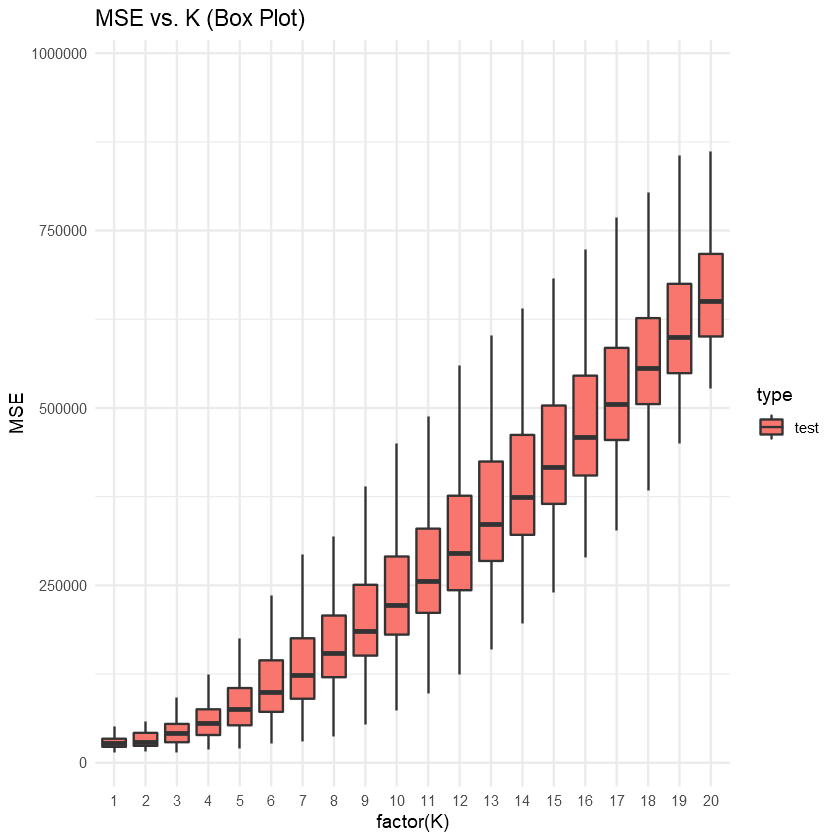

In [9]:
#import library
library(ggplot2)

ggplot(data=MSE.m[MSE.m$type=='test',], aes(factor(K), MSE,fill=type))+ geom_boxplot(outlier.shape = NA) + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('MSE vs. K (Box Plot)') + theme_minimal()

ggsave('Q3_boxplot1.jpg')

### III. Based on the plot in the previous part (Part II), how does the test error and its uncertainty behave as K increases?

The test error increases as K increases. In regards to uncertainty, it can be seen that as k increases, uncertainty increases and it starts to decrease again from k = 17 onwards.

### IV. Apply bootstrappying for KNN regression with times = 10,20,30...200, size = 25, and K = 10. Create a boxplot where x-axis is times and y-axis is average error.

In [30]:
# Bootstrapping

K <- 10           # Maximum K for KNN 
L <- 200          # number of datasets
N <- 25          # size of datasets

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

# pre-allocating data structures for results
mse1 <- vector(mode = 'numeric', length = L)


for (l in 1:L){
    #### save sample indices that were selected by bootstrap
    indx <- boot.indx[l,]
    
    ### predicted result
    test_pred <- knn(train.data[indx, ], train.label[indx,, drop = FALSE], test.data, K=K)
    
    mse1[l] <- mean(((test.label-test_pred)^2)[['y']])
}


In [31]:
# sequences for time
times <- rep((1:20)*10)

# empty vector to store Times and L
L <- numeric()
T <- numeric()

for (time in times){
    for (l in 1:time){
        L <- append(L,l)
        T <- append(T, time)
    }
}

In [32]:
# store data in dataframe
MSE1 <- data.frame('Times'=T, 'L'=L, 'test'= mse1[c(L)])

In [33]:
 # reshape for visualization
MSE1.m <- melt(MSE1, id=c('Times', 'L'))
# rename columns
names(MSE1.m) <- c('Times', 'L', 'type', 'MSE')

Saving 6.67 x 6.67 in image


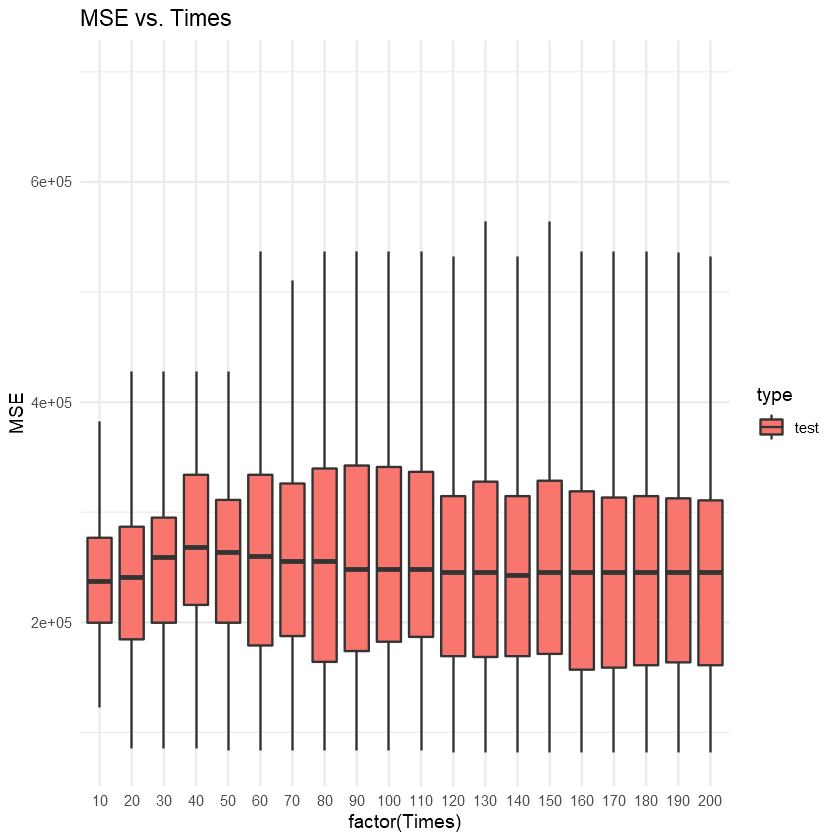

In [34]:
# plot the boxplot for visualization
ggplot(data=MSE1.m[MSE1.m$type=='test',], aes(factor(Times), MSE,fill=type)) + geom_boxplot(outlier.shape = NA)  + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('MSE vs. Times') + theme_minimal()
# ignore the warnings (because of ignoring outliers)
options(warn=-1)
ggsave('Q3_boxplot2.jpg')

### V. Based on the plot in the previous part (Part IV), how does the test error and its uncertainty behave as the number of subsets in bootstrapping increases?

The median test error is relatively stable across all value of times. The uncertainty of the error is smaller for smaller value of time, i.e. T <= 50. The uncertainty of test error is higher for T >= 70.